In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# 1. Read the dataset to the python environment

In [3]:
data=pd.read_csv(r'C:\Users\USER\Downloads\Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
AgglomerativeClustering   type         <class 'sklearn.cluster._<...>AgglomerativeClustering'>
KMeans                    type         <class 'sklearn.cluster._kmeans.KMeans'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
data                      DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np                        module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                        module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                       module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sch                       module       <module 'scipy.cluster.hi<...>\\cluster\\hierarchy.py'>
silhouette_score          function     <function silhouette_score at 0x0000017DB6AB0B80>
sns                       module       <module 'seaborn' from 'C<...

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.shape

(178, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

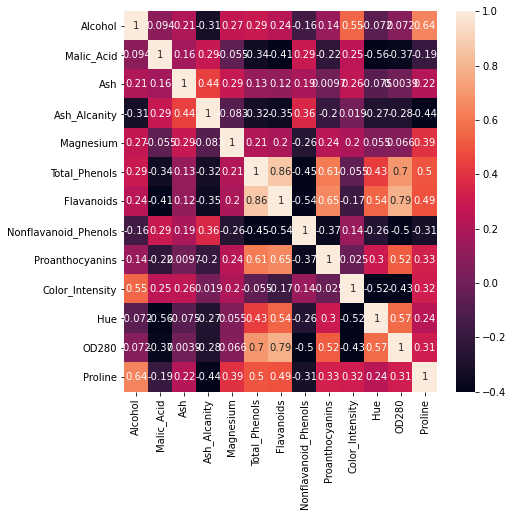

In [8]:
plt.figure(figsize=(7,7))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,vmin=-0.4)
plt.show

In [9]:
x=data.copy(deep=True)

In [10]:
scale=StandardScaler()
X=scale.fit_transform(x)

# 2. Try out different clustering models in the wine dataset.


# KMEANS

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


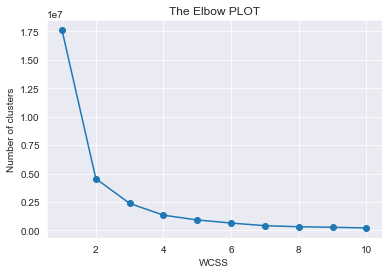

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
sns.set_style('darkgrid')
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow PLOT')
plt.xlabel('WCSS')
plt.ylabel('Number of clusters')
plt.show()


# we get that k=3

In [12]:
score=[]
for i in range(2,10):
    k = KMeans(i)
    k.fit(X)
    score.append(np.round(silhouette_score(X,k.labels_),2))
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

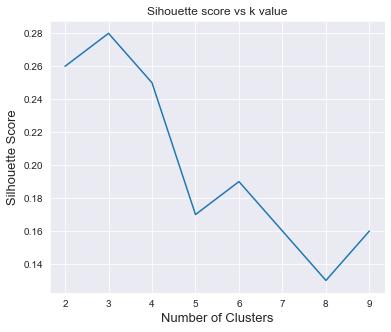

In [13]:
plt.figure(figsize=(6,5))
plt.plot(range(2,10),score)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.title('Sihouette score vs k value')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

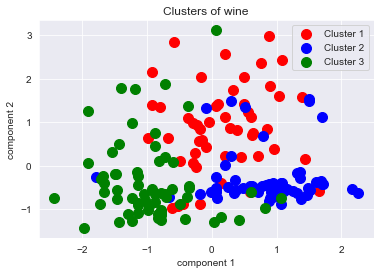

In [15]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.title('Clusters of wine')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend()
plt.show()

# 2. Agglomerative Hierarchical Clustering

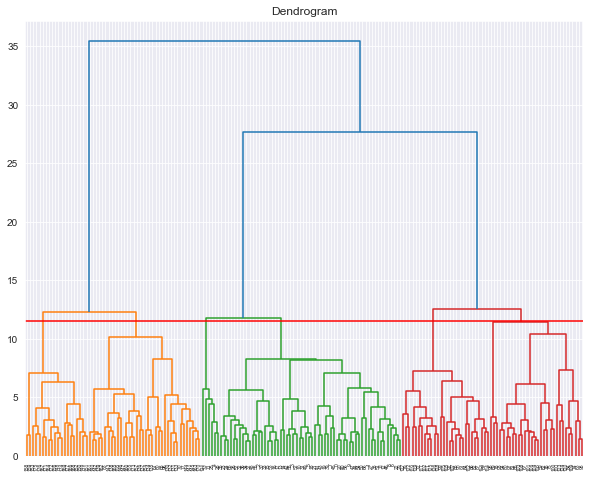

In [16]:
links = sch.linkage(X, method='ward')
plt.figure(figsize=(10, 8))
plt.title('Dendrogram')
sch.dendrogram(links)
plt.axhline(y = 11.5, color = 'r', linestyle = '-')
plt.show()

#Number of clusters is 6

In [17]:
ahc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_ahc = ahc.fit_predict(X)
y_ahc

array([1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 3, 1,
       1, 0, 2, 0, 2, 5, 3, 5, 0, 0, 0, 2, 0, 3, 0, 0, 3, 2, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 5, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)